In [8]:
import random
import math
import time
import numpy as np
import matplotlib.pyplot as plt
from progress.bar import Bar

In [9]:
class InvWeed:
    def __init__(self, initial_size=75, pmax=1000, new_seeds=200, niter=1000, delta=1e-6, max_rep=10):
        self.pop = []
        for i in range(initial_size):
            x = random.uniform(0, 10)
            y = random.uniform(0, 10)
            new_plant = [x, y, self.eval_fitness(x, y)]
            self.pop.append(new_plant)
        self.pop.sort(key=lambda x: x[2])
        self.records = [self.pop[0][2]]
        self.runtime = time.time()
        self.niters = 0
        self.iterate(pmax, new_seeds, niter, delta, max_rep)

    def eval_fitness(self, x, y):
        return x * math.sin(4 * x) + 1.1 * y * math.sin(2 * y)

    def disperse(self, x, y, omega):
        new_x = random.gauss(x, omega)
        new_y = random.gauss(y, omega)
        while new_x <= 0 or new_x >= 10:
            new_x = random.gauss(x, omega)
        while new_y <= 0 or new_y >= 10:
            new_y = random.gauss(y, omega)
        return [new_x, new_y, self.eval_fitness(new_x, new_y)]

    def reproduce(self, seeds_gen):
        all_fitness = [x[2] * -1 + self.pop[-1][2] for x in self.pop]
        sd_iterator = iter(list(np.linspace(0.5, 2, seeds_gen)))
        for plant in sorted(random.choices(self.pop, weights=[x / max(all_fitness) for x in all_fitness], k=seeds_gen),
                            key=lambda x: x[2]):
            self.pop.append(self.disperse(plant[0], plant[1], next(sd_iterator)))
        self.pop.sort(key=lambda x: x[2])

    def summary_print(self, n):
        print("Generation:", n, '\n\tPopulation size', len(self.pop), '\n\tBest plant', self.pop[0], "\n")

    def iterate(self, pmax, new_seeds, niter, delta, max_rep):
        self.runtime = time.time()
        # self.summary_print(0)
        counter = 0
        for self.niters in range(1, niter):
            self.reproduce(new_seeds)
            if len(self.pop) > pmax:
                self.pop = self.pop[:pmax]
            self.records.append(self.pop[0][2])
            # self.summary_print(self.niters)
            if self.records[self.niters - 1] - self.records[self.niters] < delta:
                counter += 1
                if counter > max_rep:
                    break
            else:
                counter = 0
        self.runtime = time.time() - self.runtime

In [12]:
def grid_search(function, pars):
    print("started")
    npars = 1
    for x in pars.values():
        npars *= len(x)
    bar = Bar('Processing', max=npars)
    bar.start()
    results = []
    for pi in pars['initial_size']:
        for pmax in pars['pmax']:
            for new_seeds in pars['new_seeds']:
                for niter in pars['niter']:
                    for delta in pars['delta']:
                        for max_rep in pars['max_rep']:
                            model = function(pi, pmax, new_seeds, niter, delta, max_rep)
                            results.append([model.records[-1], model.runtime, model.niters,
                                            [pi, pmax, new_seeds, niter, delta, max_rep]])
                            # plt.plot(model.records)
                            # plt.ylabel('Cost function')
                            # plt.xlabel('# Generation')
                            # plt.title(str([pi, pmax, new_seeds, niter, delta, max_rep]))
                            # plt.show()
                            bar.update()
    bar.finish()
    return results

In [13]:
parameters = {
    'initial_size': [5, 1000],
    'pmax': [100,  5000],
    'new_seeds': [20, 500],
    'niter': [20, 10000],
    'delta': [1e-6, 1e-9],
    'max_rep': [5, 50]
}

# parameters = {
#     'initial_size': [5, 100, 500, 1000],
#     'pmax': [200, 500, 1000, 2000],
#     'new_seeds': [20, 100, 500],
#     'niter': [20, 100, 1000],
#     'delta': [1e-3, 1e-6, 1e-9],
#     'max_rep': [1, 10, 50]
# }

t0 = time.time()
# my_model = InvWeed()

best_parameters = grid_search(InvWeed, parameters)
# print(best_parameters)
best_fitness = []
best_runtimes = []
for r in best_parameters:
    if r[0] < -18.0:
        print(r)
        print()
        best_fitness.append(r[0])
        best_runtimes.append(r[1])

with open('results.txt', 'wt') as file:
    for c in best_parameters:
        file.write(str(c))

print(time.time() - t0)

started
[-18.189863316945022, 0.00989532470703125, 19, [5, 100, 20, 20, 1e-09, 50]]

[-18.076824333444456, 0.00806117057800293, 18, [5, 100, 20, 10000, 1e-06, 5]]

[-18.52599421162725, 0.06924247741699219, 137, [5, 100, 20, 10000, 1e-06, 50]]

[-18.1653193996303, 0.01149439811706543, 25, [5, 100, 20, 10000, 1e-09, 5]]

[-18.553105107958395, 0.12233996391296387, 230, [5, 100, 20, 10000, 1e-09, 50]]

[-18.54764479402047, 0.06818842887878418, 19, [5, 100, 500, 20, 1e-06, 5]]

[-18.546350449102512, 0.06336164474487305, 19, [5, 100, 500, 20, 1e-06, 50]]

[-18.551575184579278, 0.06139683723449707, 19, [5, 100, 500, 20, 1e-09, 5]]

[-18.554044319233526, 0.060378074645996094, 19, [5, 100, 500, 20, 1e-09, 50]]

[-18.518607654556376, 0.03432154655456543, 12, [5, 100, 500, 10000, 1e-06, 5]]

[-18.550762800537065, 0.2377784252166748, 81, [5, 100, 500, 10000, 1e-06, 50]]

[-18.528943017089162, 0.03994250297546387, 14, [5, 100, 500, 10000, 1e-09, 5]]

[-18.553423269070322, 0.18936848640441895, 64, [

NameError: name 'besties' is not defined

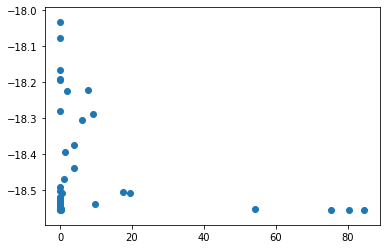

In [15]:
plt.scatter(best_runtimes, best_fitness, )